# Spaceship Base Model

## Import and concat the data

In [1]:
import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
submission_data = pd.read_csv('data/sample_submission.csv')

X = train_data.drop(columns='Transported')
y = train_data['Transported']

df = train_data.copy()

In [2]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Exploratory Data Analysis (EDA)

### Visualizing Target Variable

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/1706361685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transported', palette='viridis')


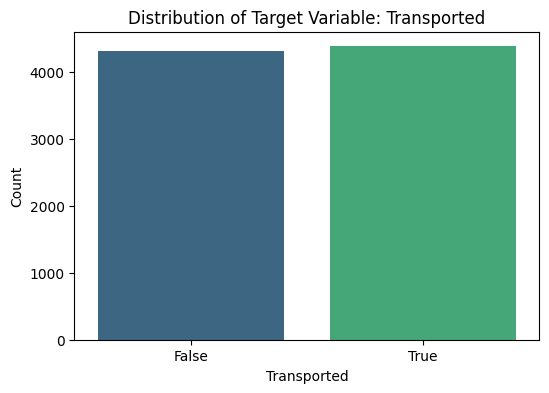

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Transported', palette='viridis')
plt.title('Distribution of Target Variable: Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

### Missing Values Analysis

Missing Values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


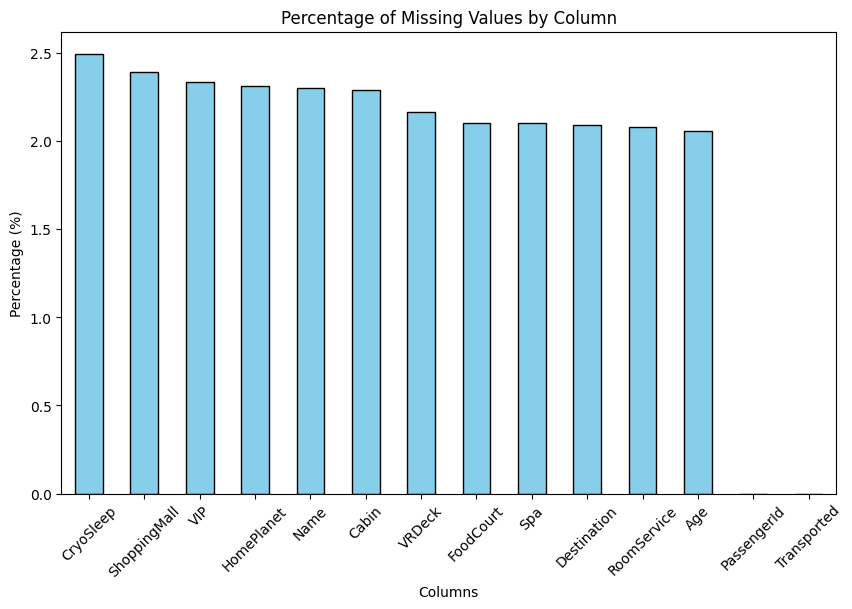

In [6]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_percent = (df.isnull().sum() / len(df)) * 100
plt.figure(figsize=(10, 6))
missing_percent.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

### Numerical Features Analysis

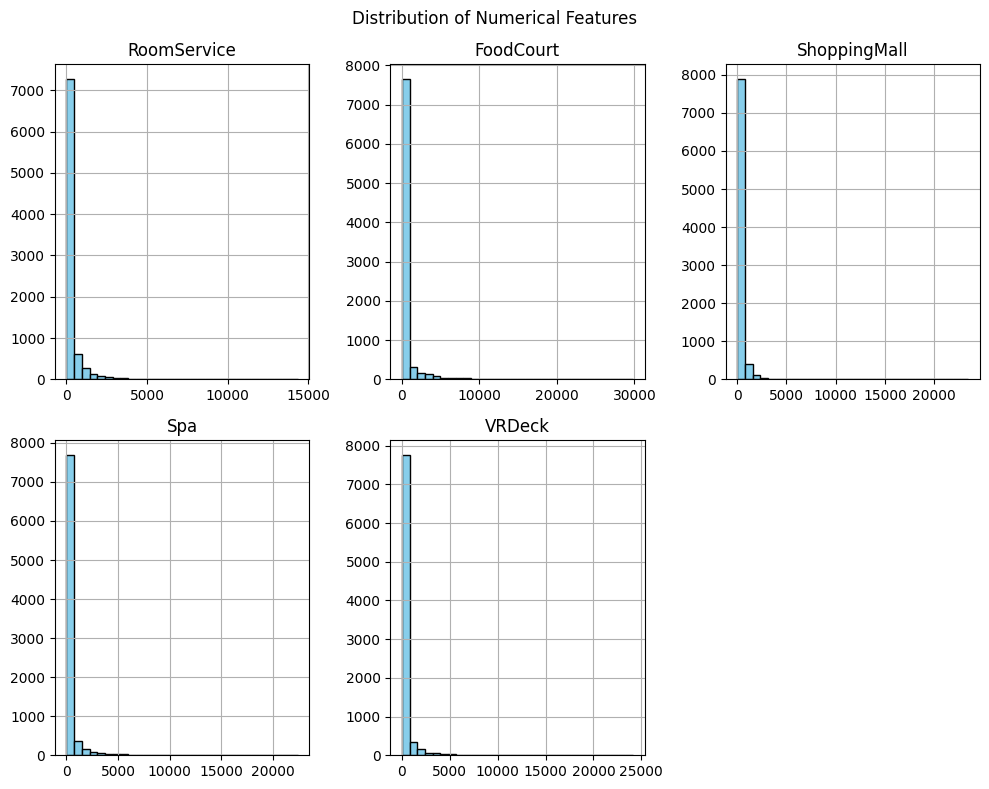

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/2202071602.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='coolwarm')
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/2202071602.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='coolwarm')
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/2202071602.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='coolwarm')
/var/folders/mz/90j2mwc116g4xxfj2_10f8b0000

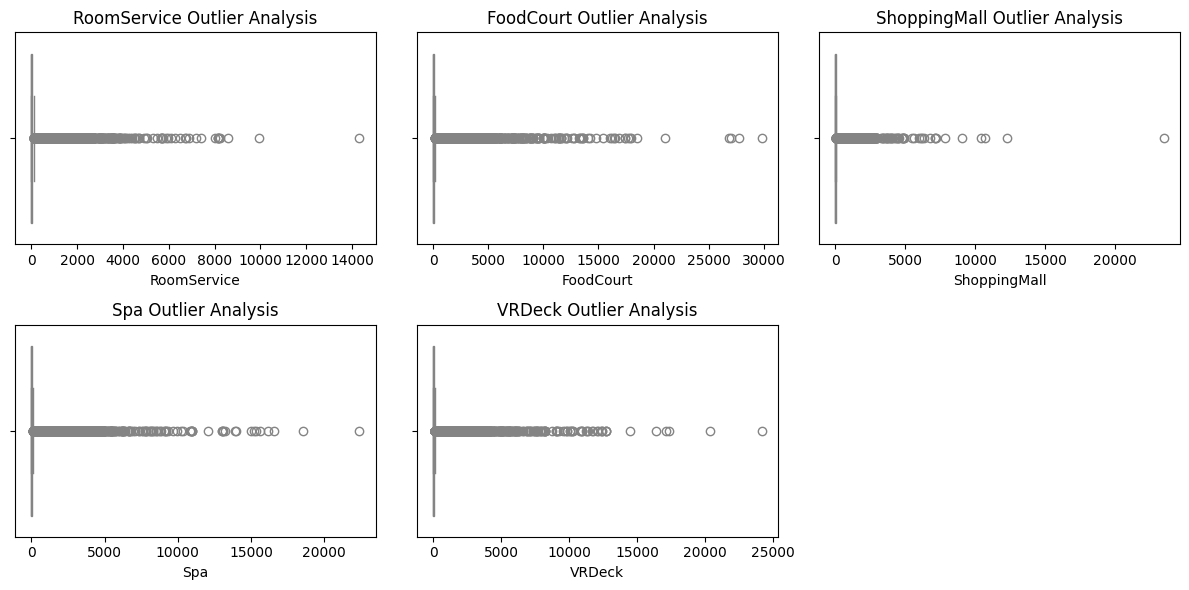

In [7]:
numerical_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df[numerical_features].hist(bins=30, figsize=(10, 8), layout=(2, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature, palette='coolwarm')
    plt.title(f'{feature} Outlier Analysis')
plt.tight_layout()
plt.show()

### Categorical Features Analysis

Unique values in HomePlanet: ['Europa' 'Earth' 'Mars' nan]
Unique values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Unique values in VIP: [False True nan]


/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/33823324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis', order=df[feature].value_counts().index)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/33823324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis', order=df[feature].value_counts().index)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/33823324.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=

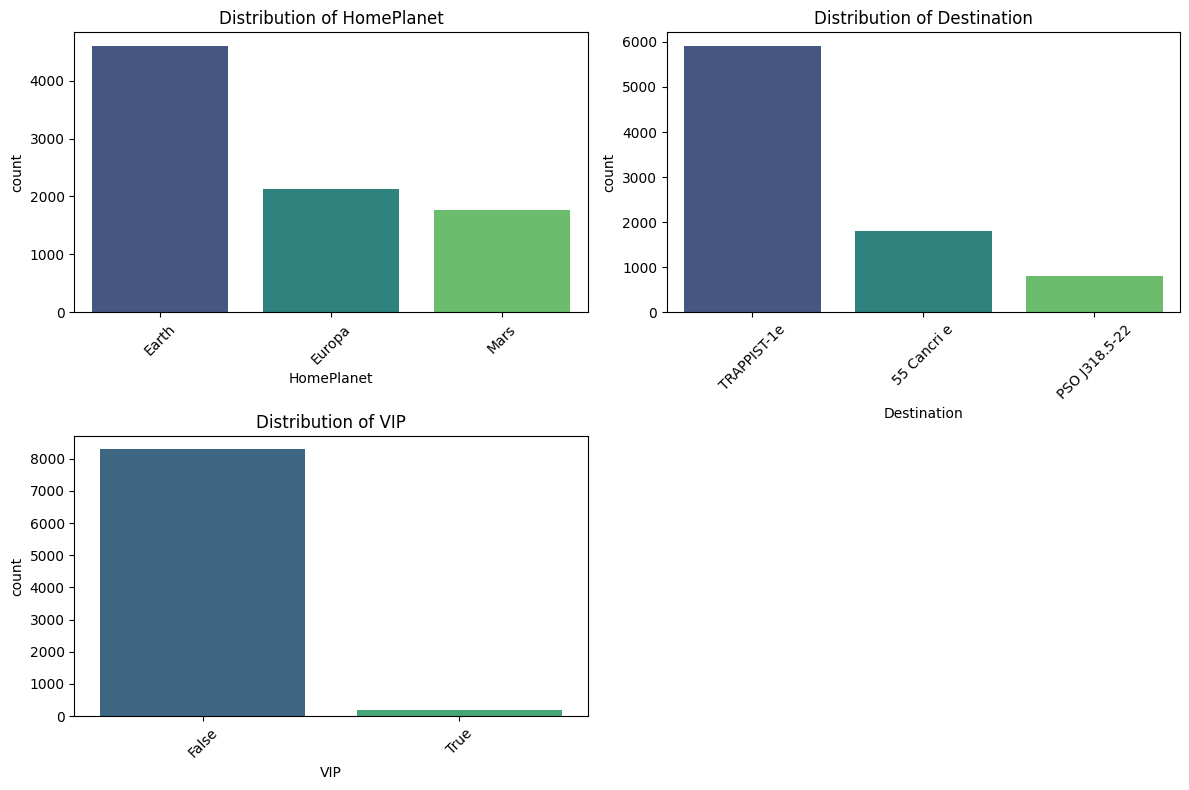

In [8]:
# in case of "Cabin" we can't understand from the graph
categorical_features = ['HomePlanet', 'Destination', 'VIP']

for feature in categorical_features:
    print(f"Unique values in {feature}: {df[feature].unique()}")

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, palette='viridis', order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relationship Analysis

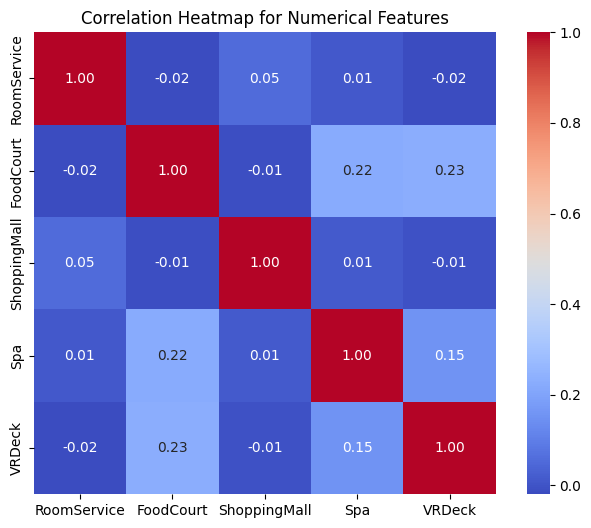

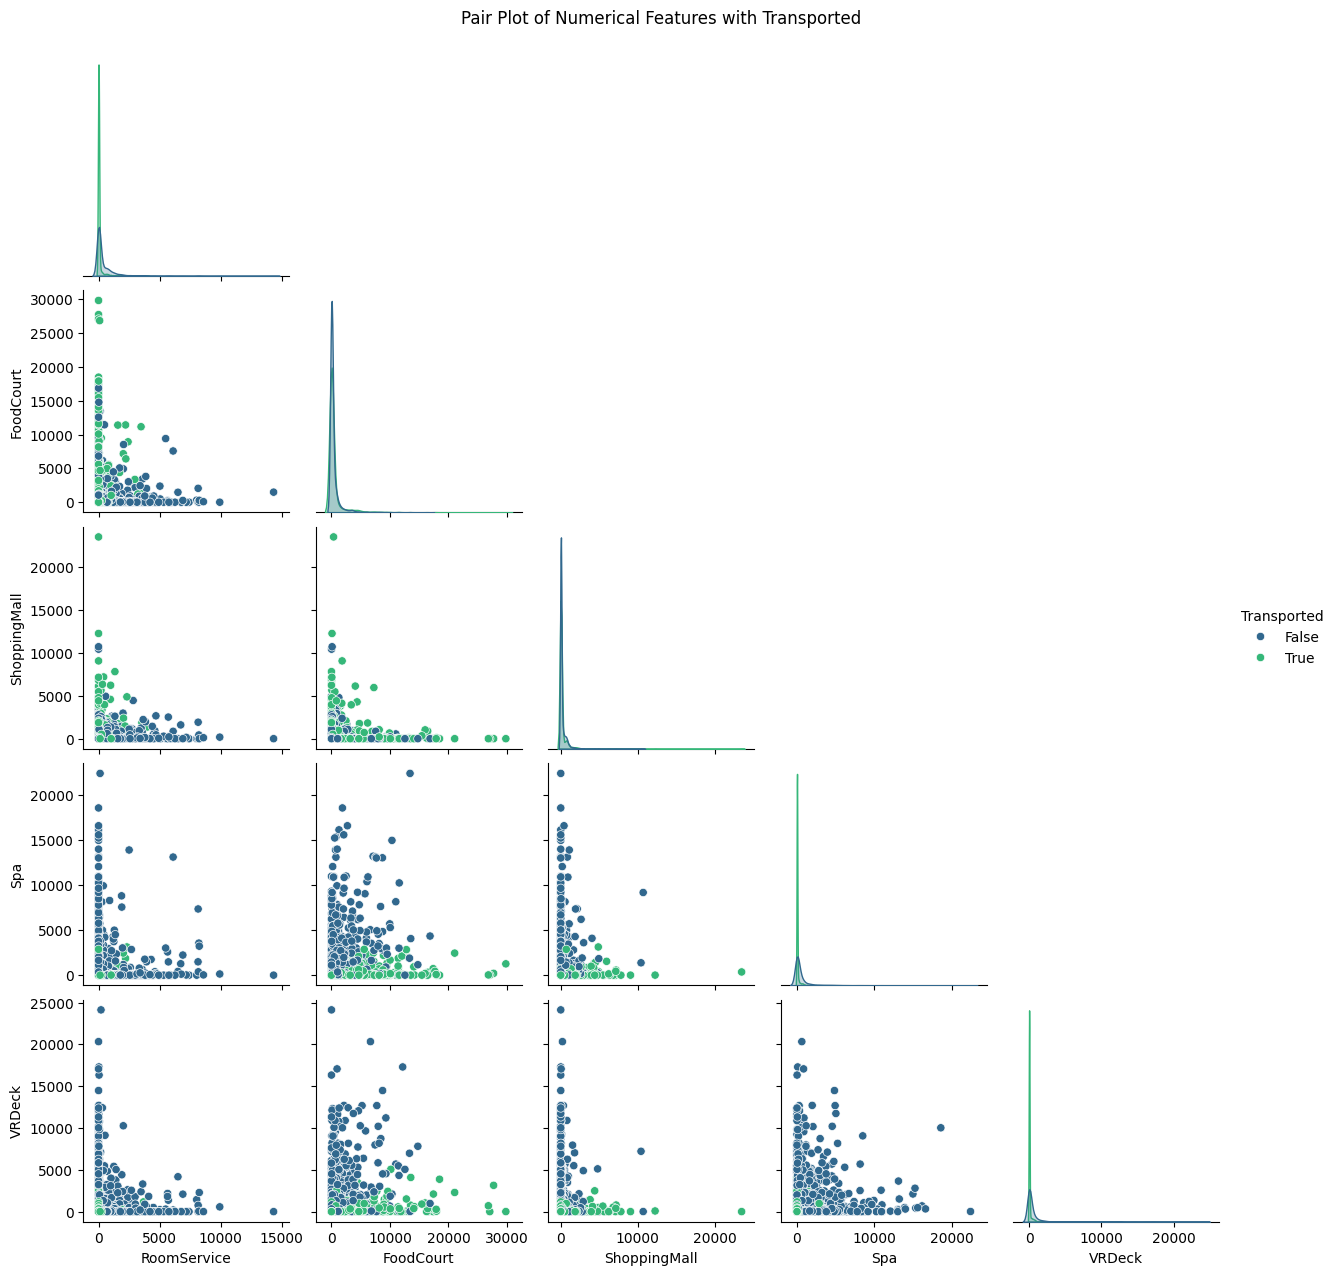

In [9]:
numerical_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

sns.pairplot(df, vars=numerical_features, hue='Transported', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Numerical Features with Transported', y=1.02)
plt.show()

### Feature Interaction

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/351489096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CryoSleep', y='RoomService', palette='viridis')


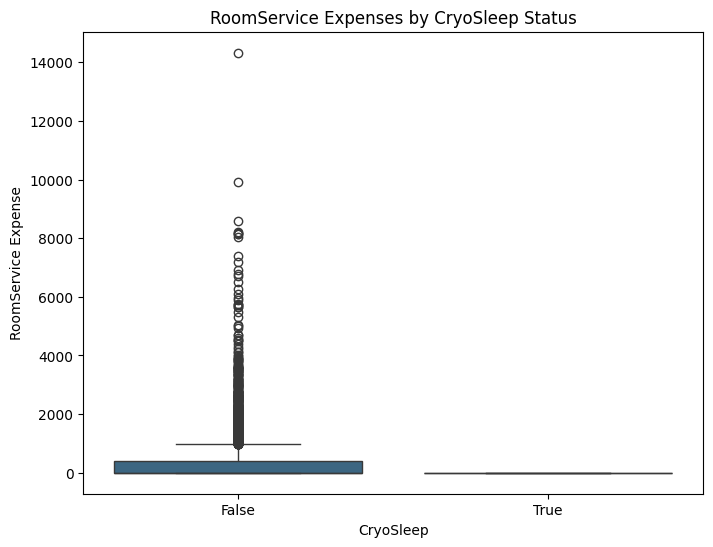

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/351489096.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='CryoSleep', y='TotalExpenses', palette='coolwarm')


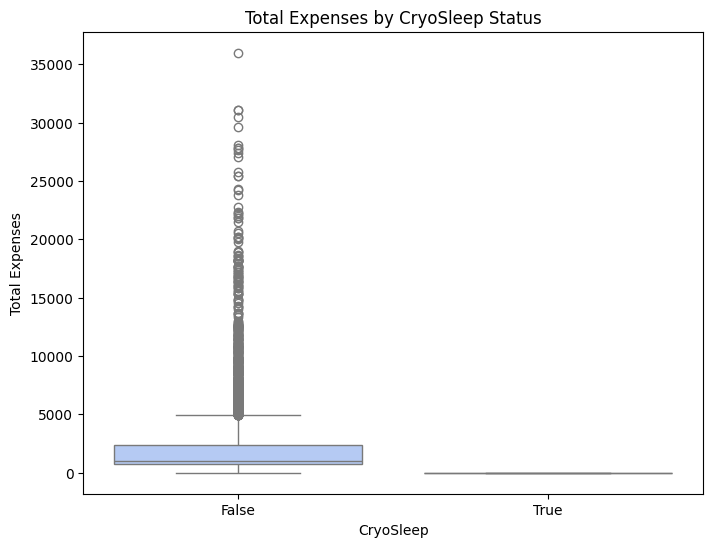

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CryoSleep', y='RoomService', palette='viridis')
plt.title('RoomService Expenses by CryoSleep Status')
plt.xlabel('CryoSleep')
plt.ylabel('RoomService Expense')
plt.show()

df['TotalExpenses'] = df[numerical_features].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='CryoSleep', y='TotalExpenses', palette='coolwarm')
plt.title('Total Expenses by CryoSleep Status')
plt.xlabel('CryoSleep')
plt.ylabel('Total Expenses')
plt.show()

## Data Preprocessing

### Numerical Columns: Impute with median values

In [11]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in numerical_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/2251782974.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(median_value, inplace=True)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/2251782974.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

### Categorical Columns: Impute with mode

In [12]:
categorical_features = ['HomePlanet', 'Destination', 'Cabin']
for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

# For 'VIP' column, fill missing values with 'False' assuming non-VIP status
df['VIP'].fillna(False, inplace=True)

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/1377885678.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(mode_value, inplace=True)
/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/1377885678.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### Feature Engineering

#### CryoSleep Column: Impute based on expense patterns

In [13]:
# Assuming passengers with zero expenses in all categories are likely in CryoSleep
expense_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['TotalExpenses'] = df[expense_features].sum(axis=1)

# If TotalExpenses is zero and CryoSleep is missing, assume CryoSleep=True
df.loc[(df['TotalExpenses'] == 0) & (df['CryoSleep'].isnull()), 'CryoSleep'] = True

# If TotalExpenses is greater than zero and CryoSleep is missing, assume CryoSleep=False
df.loc[(df['TotalExpenses'] > 0) & (df['CryoSleep'].isnull()), 'CryoSleep'] = False

# Drop the 'TotalExpenses' column as it's no longer needed
df.drop(columns=['TotalExpenses'], inplace=True)

df = df.drop(columns=['Name'], axis=1)

#### Verify if all missing values are handled

In [14]:
missing_values = df.isnull().sum()
print("Missing Values after Imputation:\n", missing_values)

Missing Values after Imputation:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [15]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


#### Data Type Conversion

In [16]:
# Split 'Cabin' into 'Deck', 'Num', and 'Side'
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

# Drop the original 'Cabin' column
df = df.drop('Cabin', axis=1)

conv_dict = {
    'HomePlanet': {'Europa': 0, 'Earth': 1, 'Mars': 2},
    'CryoSleep': {False: 0, True: 1},
    'Destination': {'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2},
    'VIP': {True: 1, False: 0},
    'Deck': {j: i for i, j in enumerate(sorted(df['Deck'].unique()))},
    'Side': {'P': 0, 'S': 1},
    'Transported': {False: 0, True: 1}
}

df = df.replace(conv_dict)

# Move the target to the end
df = df[[col for col in df if col != 'Transported'] + ['Transported']]

df

/var/folders/mz/90j2mwc116g4xxfj2_10f8b00000gn/T/ipykernel_2928/3636581032.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(conv_dict)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Transported
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1,1
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,98,0,0
8689,9278_01,1,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,6,1499,1,0
8690,9279_01,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,6,1500,1,1
8691,9280_01,0,0,1,32.0,0,0.0,1049.0,0.0,353.0,3235.0,4,608,1,0


## Building the Base Model

### Check if the data is imbalanced

In [17]:
from collections import Counter

count = Counter(df['Transported'])
count

Counter({1: 4378, 0: 4315})

### Scale and Split Data into Train and Test Sets

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Transported', axis=1)
y = df['Transported']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# choosing the random state for the model
random_state = 42

### Train a Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_model = LogisticRegression(random_state=random_state)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7723945625653538
Logistic Regression Confusion Matrix:
 [[1046  378]
 [ 275 1170]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1424
           1       0.76      0.81      0.78      1445

    accuracy                           0.77      2869
   macro avg       0.77      0.77      0.77      2869
weighted avg       0.77      0.77      0.77      2869



### Train a Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight="balanced", random_state=random_state)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7967933077727432
Random Forest Confusion Matrix:
 [[1153  271]
 [ 312 1133]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1424
           1       0.81      0.78      0.80      1445

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869



### ROC and AUC Curves

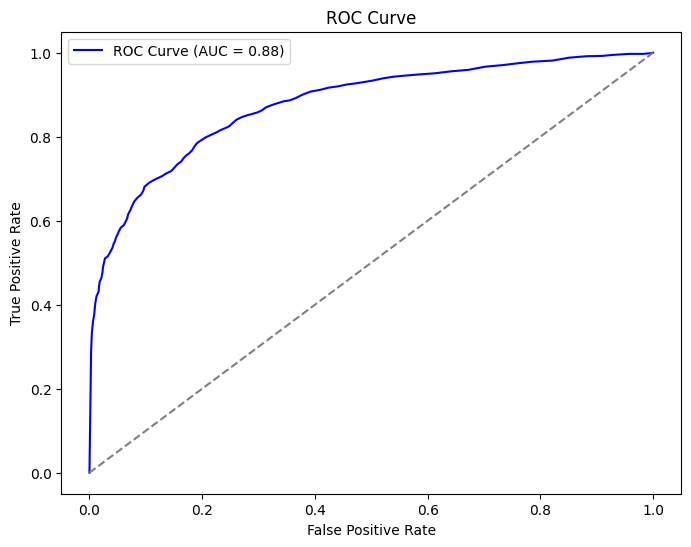

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### K-Fold Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
print(f"Stratified Cross-validated Accuracy scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

cv_scores_recall = cross_val_score(rf_model, X, y, cv=5, scoring='recall')
print(f"Cross-validated Recall scores: {cv_scores_recall}")
print(f"Mean Recall: {cv_scores_recall.mean():.4f}")

Stratified Cross-validated Accuracy scores: [0.79055794 0.80686695 0.8223176  0.80944206 0.78264605]
Mean Accuracy: 0.8024
Cross-validated Recall scores: [0.32762557 0.63356164 0.81506849 0.85485714 0.50971429]
Mean Recall: 0.6282


### Set a lower threshold to adjust Recall

In [46]:
from sklearn.metrics import recall_score

y_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_probs >= 0.3).astype(int)

recall = recall_score(y_test, y_pred_adjusted)
print(f"Adjusted Recall: {recall:.4f}")

Adjusted Recall: 0.9003


### Train Random Forest Classifier after balancing the data

In [47]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=random_state)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7967933077727432
Random Forest Confusion Matrix:
 [[1153  271]
 [ 312 1133]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1424
           1       0.81      0.78      0.80      1445

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869



## Model Tuning

### Tuning the hyperparameters

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced', None],
    # 'min_samples_split': [2, 10],
    # 'min_samples_leaf': [1, 4],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid, verbose=10, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START class_weight=balanced, max_depth=10, n_estimators=100......
[CV 1/5; 1/18] END class_weight=balanced, max_depth=10, n_estimators=100;, score=0.810 total time=   0.3s
[CV 2/5; 1/18] START class_weight=balanced, max_depth=10, n_estimators=100......
[CV 2/5; 1/18] END class_weight=balanced, max_depth=10, n_estimators=100;, score=0.801 total time=   0.3s
[CV 3/5; 1/18] START class_weight=balanced, max_depth=10, n_estimators=100......
[CV 3/5; 1/18] END class_weight=balanced, max_depth=10, n_estimators=100;, score=0.797 total time=   0.3s
[CV 4/5; 1/18] START class_weight=balanced, max_depth=10, n_estimators=100......
[CV 4/5; 1/18] END class_weight=balanced, max_depth=10, n_estimators=100;, score=0.806 total time=   0.3s
[CV 5/5; 1/18] START class_weight=balanced, max_depth=10, n_estimators=100......
[CV 5/5; 1/18] END class_weight=balanced, max_depth=10, n_estimators=100;, score=0.814 total time=   0.3s
[CV 

### Trying the best parameters from Grid Search

In [51]:
rf_model = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7967933077727432
Random Forest Confusion Matrix:
 [[1100  324]
 [ 259 1186]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1424
           1       0.79      0.82      0.80      1445

    accuracy                           0.80      2869
   macro avg       0.80      0.80      0.80      2869
weighted avg       0.80      0.80      0.80      2869

